## Titanic Data EDA

In [1]:
#Iporting package and converting .csv file to dataframe using pandas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## Step 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes
* describe

In [2]:
train_data=pd.read_csv("train.csv")
train_data.shape #Give (row, column)

(891, 12)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Type casting some object to category for better insight on categorical data
train_data.Sex=train_data['Sex'].astype("category")
train_data.Embarked=train_data['Embarked'].astype("category")
train_data.Pclass=train_data['Pclass'].astype("category")
train_data.Survived=train_data['Survived'].astype("category")

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


In [7]:
train_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.describe(include="category")

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [9]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Step 2: Feature Understanding

* Plotting Feature Distributions
    - Countplot
    - Distribution plot
    - Histogram
    - Heatmap

In [10]:
len(train_data["Survived"])

891

The percentage of the total passeneger that died is  61.62% while only  38.38% survived


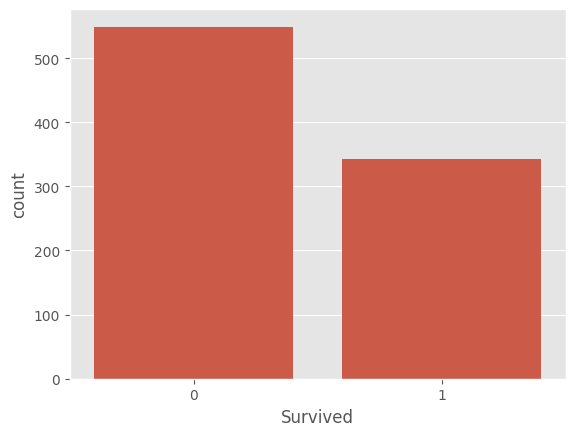

In [11]:
# 0 denotes dead while 1 denotes survived)
sns.countplot(x="Survived", data=train_data)
count_d = train_data.loc[train_data["Survived"] == 0]["Survived"].count()
per_d = count_d/len(train_data["Survived"])*100
print(f'The percentage of the total passeneger that died is {per_d: .2f}% while only {100-per_d: .2f}% survived')  

Text(0.5, 1.0, 'Distribution Plot for Age')

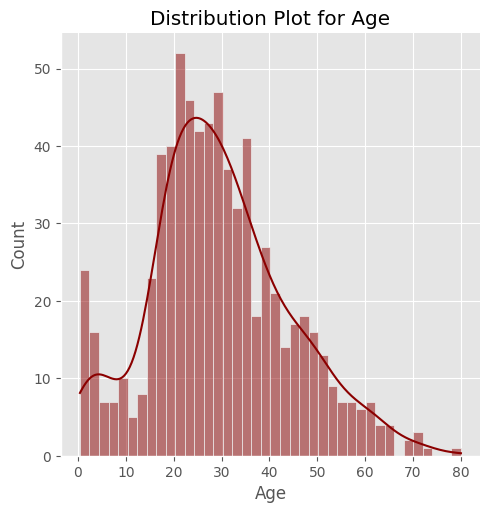

In [12]:
sns.displot(train_data['Age'].dropna(),kde=True,color='darkred',bins=40)
plt.title("Distribution Plot for Age")

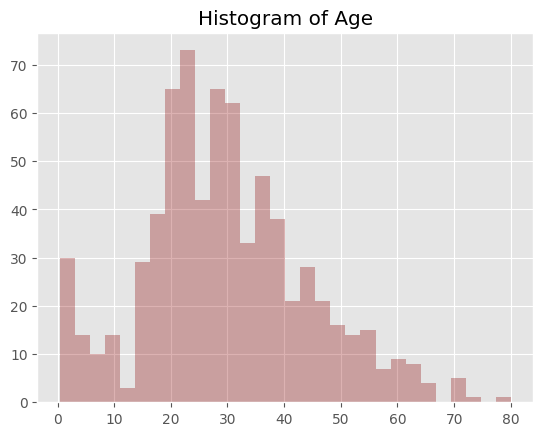

In [13]:
#.hist function in pandas to create a histogram 
ax = train_data['Age'].hist(bins=30,color='darkred',alpha=0.3)
ax.set_title("Histogram of Age")
plt.show()

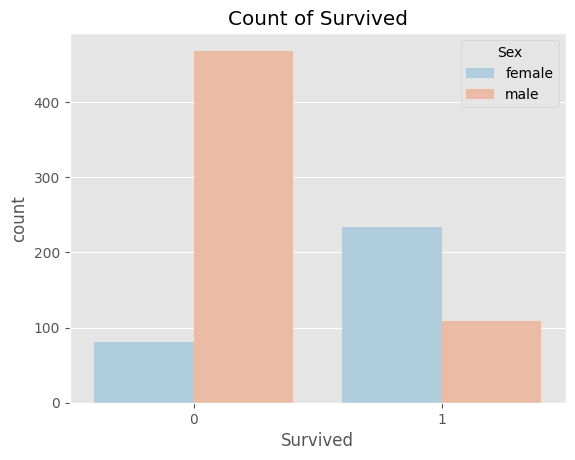

In [14]:
ax = sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')
ax.set_title("Count of Survived")
plt.show()

In [15]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"Percentage of women who survived: {rate_women*100: .2f}%")

Percentage of women who survived:  74.20%


In [16]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"Percentage of men who survived: {rate_men*100: .2f}%")

Percentage of men who survived:  18.89%


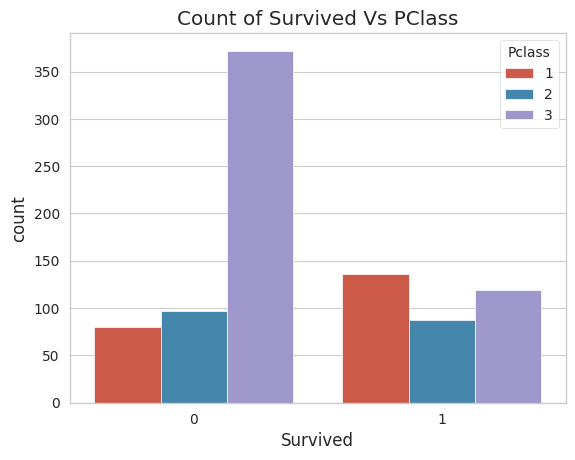

In [17]:
sns.set_style('whitegrid')
ax = sns.countplot(x="Survived",hue='Pclass',data=train_data)
ax.set_title("Count of Survived Vs PClass")
plt.show()


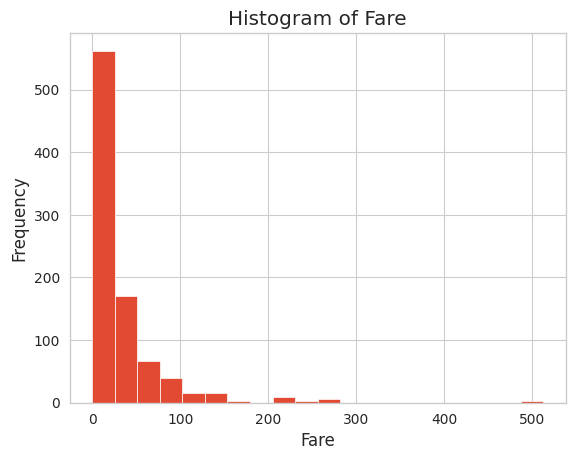

In [18]:
ax = train_data['Fare'].plot(kind='hist',
                          bins=20,
                          title='Histogram of Fare')
ax.set_xlabel('Fare')
plt.show()

In [19]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

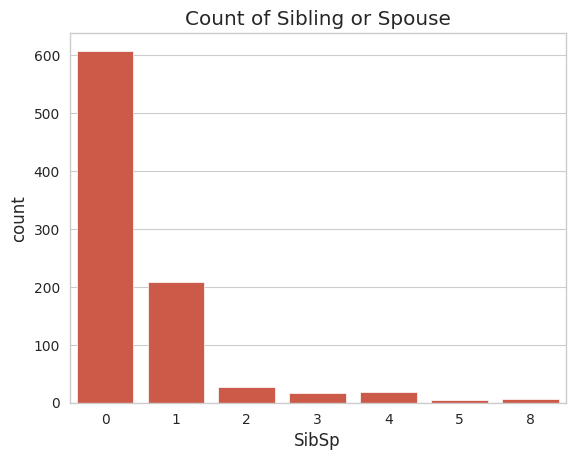

In [20]:
ax=sns.countplot(x='SibSp', data=train_data)
ax.set_title("Count of Sibling or Spouse")
plt.show()

In [21]:
td_cor = train_data[['Survived','Pclass','Age',
                     'SibSp','Parch','Fare']].dropna().corr()
td_cor    

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


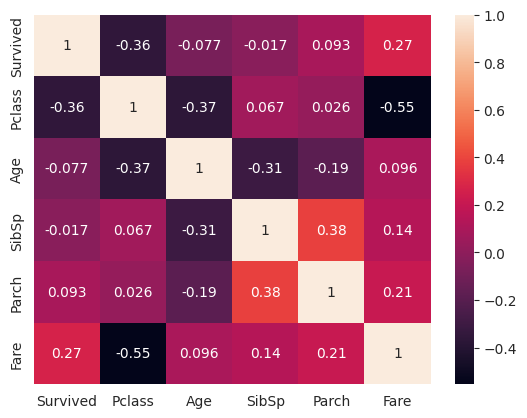

In [22]:
sns.heatmap(td_cor, annot=True)
plt.show()

## Step 3: Data Preperation
* Data Cleaning
    - Filling Missing Value
    - Dropping Unecessary columns
    - One Hot Encoding


In [23]:
#Finding null values for each given attribute
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

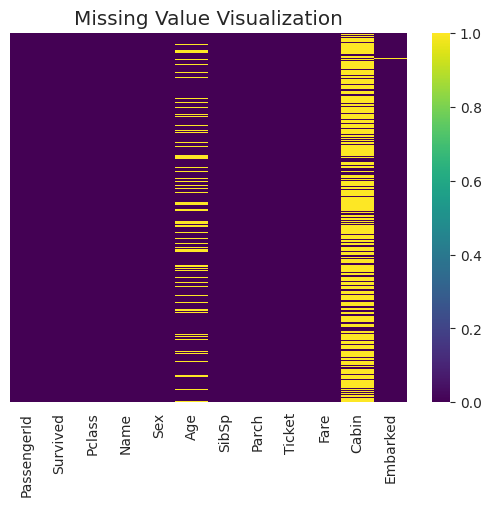

In [24]:
#Missing value heat map visualization
ax = sns.heatmap(data = train_data.isnull(),
            yticklabels=False,
            cbar=True,
            cmap='viridis')
ax.set_title("Missing Value Visualization")
plt.show()

In [25]:
#Checking for duplicated rows
train_data.loc[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Filling missing values for Attribute Age

In [26]:
# Using simple mean to replace all missing value 
# train_data["Age"].mean()
# train_data['Age'].fillna(29, inplace=True) 

<Axes: ylabel='Age'>

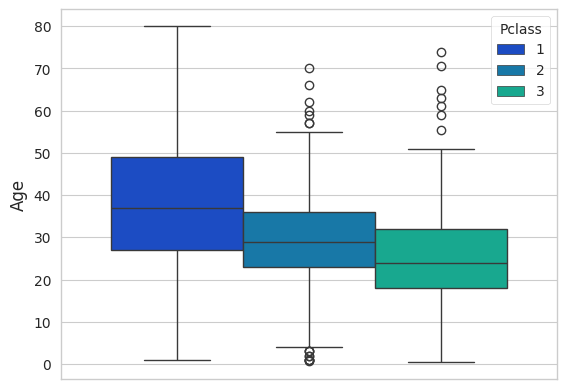

In [27]:
sns.boxplot(hue='Pclass',y='Age',data=train_data,palette='winter')

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_10283/822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_10283/822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [30]:
#Attribute Cabin is missing a lot of values so we need to drop the attribute
train_data=train_data.drop(['Cabin'], axis=1).copy()

In [31]:
train_data.dropna(inplace=True)

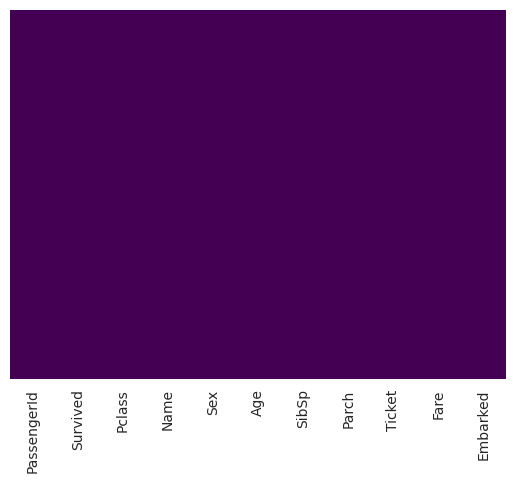

In [32]:
#Rechecking heatmap
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [33]:
import cufflinks as cf
cf.go_offline()

In [34]:
train_data['Fare'].iplot(kind='hist',bins=30,color='green')

## One hot encoding

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 59.5+ KB


In [36]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [37]:
embark = pd.get_dummies(train_data['Embarked'],drop_first=True).astype(int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
#Dropping all unecessary varaiables
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
train_data = pd.concat([train_data,sex,embark],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
#Dropping Categorical fetures 
train_data = train_data.drop('male', axis=1).copy()
train_data = train_data.drop('Q', axis=1).copy()
train_data = train_data.drop('S', axis=1).copy()

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Data is ready for modeling
* Splitting dataset into training and testing data

In [43]:
x = train_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train_data['Survived']

In [44]:
#importing sklearn to train a ML model
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

## Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [47]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [48]:
#Cheking prediction of the model 
prediction = logmodel.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

In [49]:
prediction_df = pd.DataFrame(prediction,columns=["Survived_predicted"])
prediction_df

,Survived_predicted
0,0
1,0
2,1
3,1
4,0
...,...
262,0
263,0
264,0
265,1


In [50]:
#Testing model accuracy
from sklearn.metrics import confusion_matrix

In [51]:
accuracy = confusion_matrix(y_test,prediction)
accuracy

array([[142,  21],
       [ 53,  51]])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7228464419475655

## Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()

In [55]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
#predicttion with decison tree model
prediction = dtmodel.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [57]:
#Testing the accuracy of the model 
from sklearn.metrics import confusion_matrix

In [58]:
accuracy = confusion_matrix(prediction,y_test)
accuracy

array([[110,  49],
       [ 53,  55]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.6179775280898876

## Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier()

In [61]:
rfclass.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
prediction = rfclass.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [63]:
#testing accuracy of the model
from sklearn.metrics import confusion_matrix

In [64]:
accuracy = confusion_matrix(prediction,y_test)
accuracy

array([[133,  49],
       [ 30,  55]])

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.704119850187266

## xgboost model

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()

In [67]:
xgboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [68]:
prediction = xgboost.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [69]:
#Accuracy of the model
from sklearn.metrics import confusion_matrix

In [70]:
accuracy = confusion_matrix(prediction,y_test)
accuracy

array([[143,  57],
       [ 20,  47]])

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,y_test)
accuracy

0.7116104868913857